<a href="https://colab.research.google.com/github/Allam0053/quadrathlon/blob/main/Quadrathlon_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **use kaggle API**

In [ ]:
!echo '{"username":"ariffaizin","key":"9c3c17b1c9f2112ceb774af06e41e16c"}' > kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change permission
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c quadrathlon-hmtc-its-2020

### **Import data**

In [ ]:
# melakukan ekstraksi pada file zip
# file dari kaggle masih berupa zip
import zipfile,os
train_zip = 'train_weatherAUS.csv.zip'
test_zip = 'test_weatherAUS.csv.zip'
zip_ref1 = zipfile.ZipFile(train_zip, 'r')
zip_ref2 = zipfile.ZipFile(test_zip, 'r')
zip_ref1.extractall()
zip_ref2.extractall()
zip_ref1.close()
zip_ref2.close()

In [ ]:
# import library
# read train and test file

import pandas as pd
import numpy as np

df_train = pd.read_csv("train_weatherAUS.csv")
df_test = pd.read_csv("test_weatherAUS.csv")

In [ ]:
df_train.head()

In [ ]:
df_test.head()

### **Foto iklim di australia**

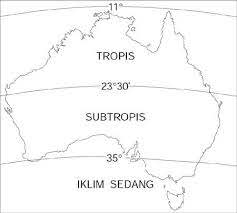

**Foto kota-kota di australia**

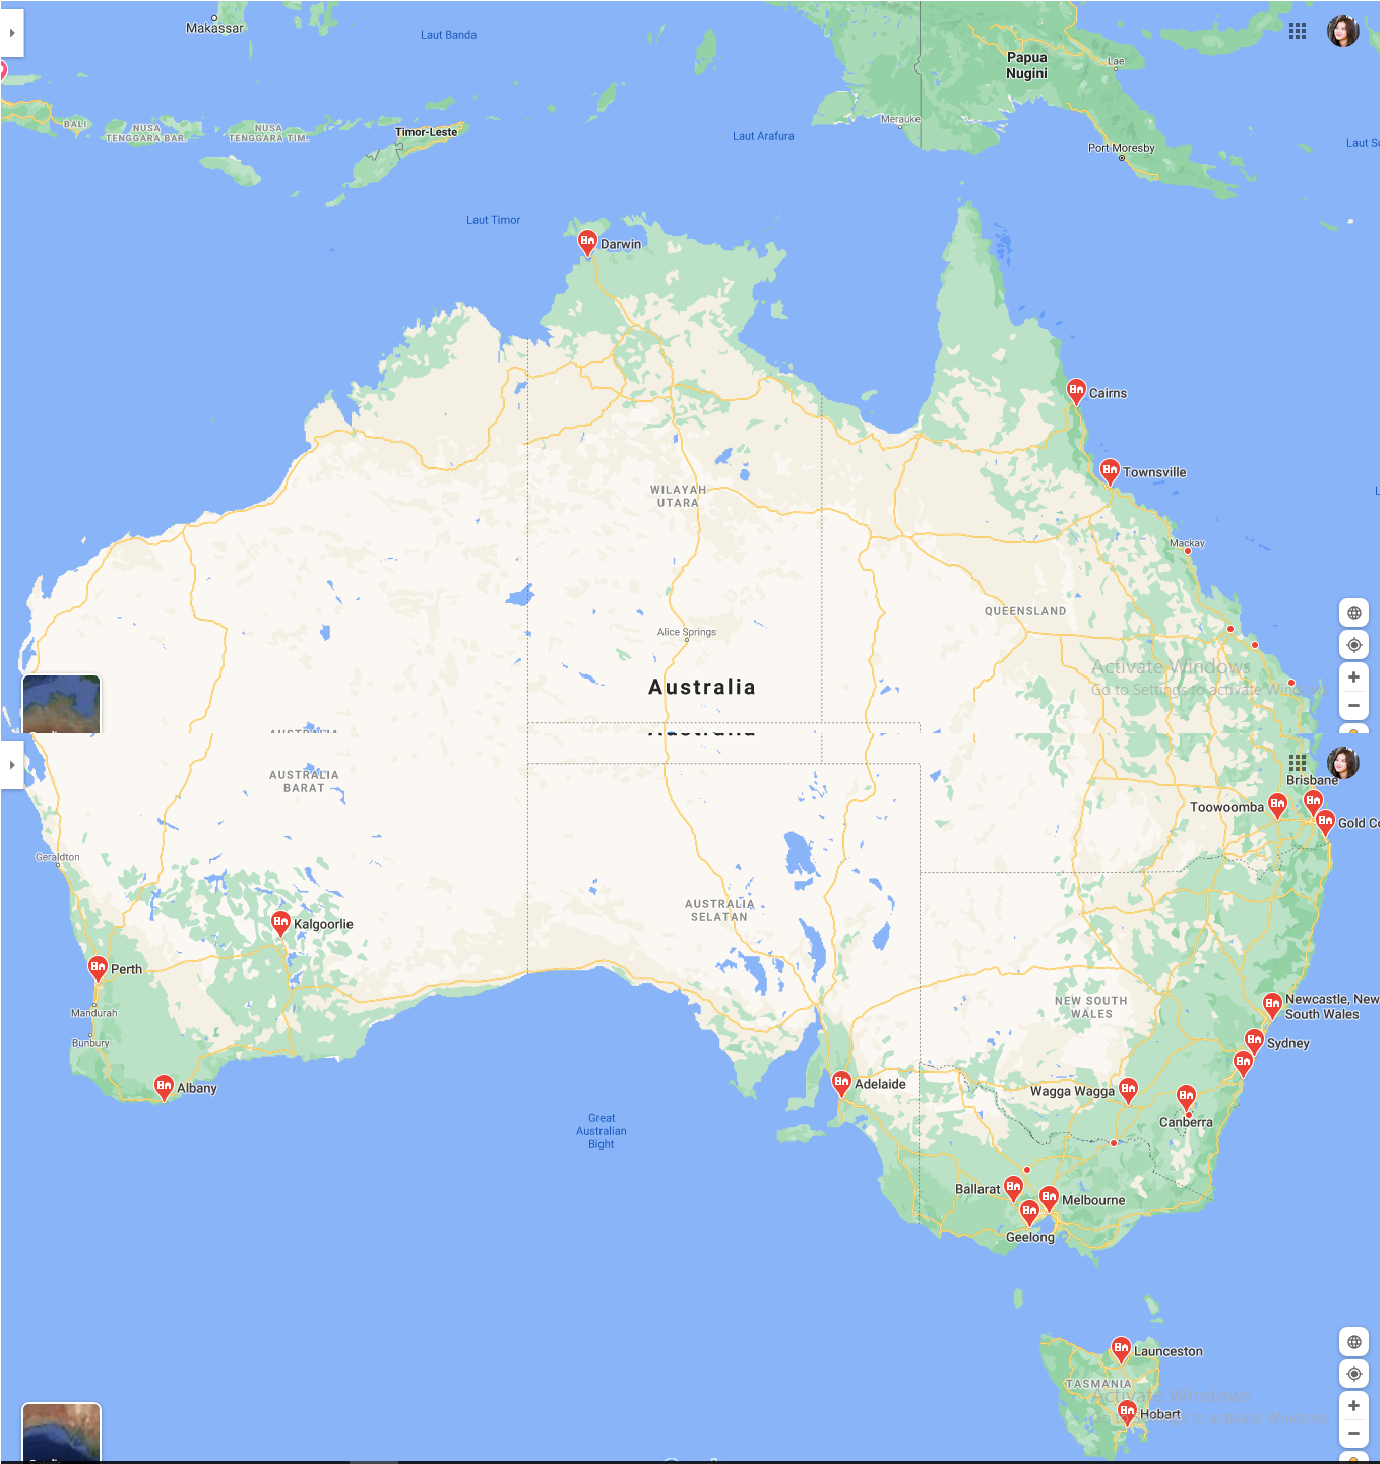

 Foto iklim di australia

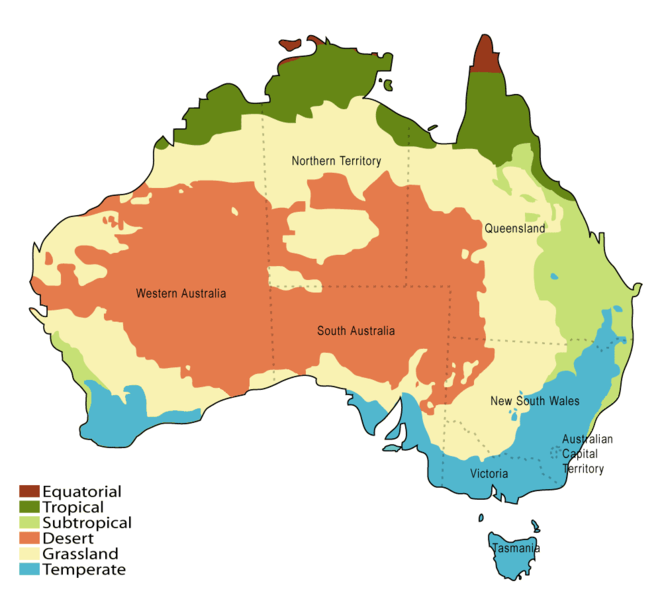

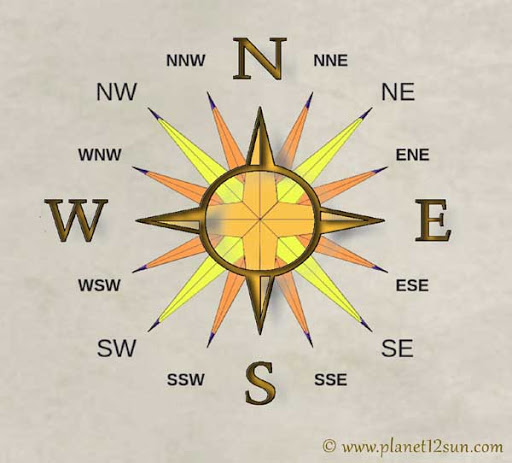

### **Preprocessing**

**DO NOT RUN THIS CELL TWICE!!!**

**JUST ONCE!!!**

In [ ]:
direction = {'N':0, 'NNE':1, 'NE':2, 'ENE':3, 
                  'E':4, 'ESE':5, 'SE':6, 'SSE':7, 
                  'S':8, 'SSW':9, 'SW':10, 'WSW':11, 
                  'W':12, 'WNW':13, 'NW':14, 'NNW':15}

In [ ]:
# convert string to numeric value
df_train['WindGustDir'] = df_train.WindGustDir.apply(lambda x: direction.get(x))
df_train['WindDir9am'] = df_train.WindDir9am.apply(lambda x: direction.get(x))
df_train['WindDir3pm'] = df_train.WindDir3pm.apply(lambda x: direction.get(x))
df_train.head()

In [ ]:
# convert string to numeric value
df_test['WindGustDir'] = df_test.WindGustDir.apply(lambda x: direction.get(x))
df_test['WindDir9am'] = df_test.WindDir9am.apply(lambda x: direction.get(x))
df_test['WindDir3pm'] = df_test.WindDir3pm.apply(lambda x: direction.get(x))
#df_test.head()

### **Mengisi data kosong**

In [ ]:
# count the sum of missing value
df_train.isna().sum()

In [ ]:
# count the sum of missing value
df_test.isna().sum()

In [ ]:
boolLabel = {'No':0, 'Yes':1}
pd.options.display.max_rows = 10

df_train_pre = df_train.copy()
df_test_pre = df_test.copy()

In [ ]:
# convert string to numeric value
df_train_pre['RainToday'] = df_train_pre.RainToday.apply(lambda x: boolLabel.get(x))
df_train_pre['RainTomorrow'] = df_train_pre.RainTomorrow.apply(lambda x: boolLabel.get(x))

# df_train_pre['WindGustDir'] = df_train_pre['WindGustDir'].fillna(df_train_pre['WindGustDir'].mode()[0])
# df_train_pre['WindDir9am'] = df_train_pre['WindDir9am'].fillna(df_train_pre['WindDir9am'].mode()[0])
# df_train_pre['WindDir3pm'] = df_train_pre['WindDir3pm'].fillna(df_train_pre['WindDir3pm'].mode()[0])
# df_train_pre['RainToday'] = df_train_pre['RainToday'].fillna(df_train_pre['RainToday'].mode()[0])

# df_train_pre = df_train_pre.fillna(df_train_pre.mean())

df_train_pre = df_train_pre.sort_values(['Location','Date'], ascending=[True, True])

#df_train_pre.iloc[0:5100]

In [ ]:
# convert string to numeric value
df_test_pre['RainToday'] = df_test_pre.RainToday.apply(lambda x: boolLabel.get(x))

# df_test_pre['WindGustDir'] = df_test_pre['WindGustDir'].fillna(df_test_pre['WindGustDir'].mode()[0])
# df_test_pre['WindDir9am'] = df_test_pre['WindDir9am'].fillna(df_test_pre['WindDir9am'].mode()[0])
# df_test_pre['WindDir3pm'] = df_test_pre['WindDir3pm'].fillna(df_test_pre['WindDir3pm'].mode()[0])
# df_test_pre['RainToday'] = df_test_pre['RainToday'].fillna(df_test_pre['RainToday'].mode()[0])

# df_test_pre = df_test_pre.fillna(df_test_pre.mean())

df_test_pre = df_test_pre.sort_values(['Location','Date'], ascending=[True, True])

#df_test_pre.iloc[0:5100]

In [ ]:
df_train_isna = df_train_pre.copy()
df_test_isna = df_test_pre.copy()

In [ ]:
df_train_isna['Cloud9am'].iloc[0] = 4
df_train_isna['Cloud3pm'].iloc[0] = 4
df_test_isna['Cloud9am'].iloc[0] = 4
df_test_isna['Cloud3pm'].iloc[0] = 4

In [ ]:
df_train_isna.fillna(method='ffill', inplace=True)
df_test_isna.fillna(method='ffill', inplace=True)

### **Visualisasi Data**

visualisasi data, berdasarkan kota:

-sunshine

-angin

-humidity

-pressure

-cloud

-temp

-rain today

-rainfall

In [ ]:
# import library for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
color = sns.color_palette()
sns.set_style('darkgrid')

In [ ]:
# #plot RainTomorrow Frequency in AliceSprings
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# langs = ['0', '1']
# y1 = select[(select['RainTomorrow']==0)]
# y2 = select[(select['RainTomorrow']==1)]
# students = [ int(y1['Id'].count()) , int(y2['Id'].count())]
# ax.bar(langs,students)
# ax.set_title('RainTomorrow Frequency in AliceSprings')
# plt.show()

# #plot today+tomorrow
# x1 = select[(select['RainToday']==0)]
# x2 = select[(select['RainToday']==1)]

# data = [[int(x1['Id'].count()), int(y1['Id'].count())],
#         [int(x2['Id'].count()), int(y2['Id'].count())]]

# #data = [[raintoday==0, raintomorrow==0],
# #        [raintoday==1, raintomorrow==1]]
# #urutan plot today0 today1;  tomorrow0 tomorrow1;

# X = np.arange(2)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.legend(labels=['Terang', 'Hujan'])
# ax.set_ylabel('Frequency')
# ax.set_title('Rain Today & Tomorrow in AliceSprings')
# ax.bar(X + 0.25, data[0], color = 'b', width = 0.375)
# ax.bar(X + 0.625, data[1], color = 'g', width = 0.375)
# #ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

### **Daftar Kota di Aus** (dari dataset)

In [ ]:
city = df_train_isna['Location'].value_counts()
city = city.sort_index()
city_list = city.index

### **Korelasi**

In [ ]:
# correlation between columns
select = df_train_isna[(df_train_isna['Location']=='Adelaide')]
corrmat = select.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt=".1f")

### **Visualisasi jumlah hujan** berdasarkan kota

In [ ]:
# visualization of the raintoday and raintomorrow of each city
for i in range(city.count()):
  select = df_train_pre[(df_train_pre['Location']==city_list[i])]

  x1 = select[(select['RainToday']==0)]
  x2 = select[(select['RainToday']==1)]
  y1 = select[(select['RainTomorrow']==0)]
  y2 = select[(select['RainTomorrow']==1)]

  data = [[int(x1['Id'].count()), int(y1['Id'].count())],
          [int(x2['Id'].count()), int(y2['Id'].count())]]

  #data = [[raintoday==0, raintomorrow==0],
  #        [raintoday==1, raintomorrow==1]]
  #urutan plot today0 today1;  tomorrow0 tomorrow1;

  X = np.arange(2)
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.legend(labels=['Terang', 'Hujan'])
  ax.set_ylabel('Frequency')
  ax.set_title('Rain Today & Tomorrow in '+ city_list[i])
  ax.bar(X + 0.25, data[0], color = 'b', width = 0.375)
  ax.bar(X + 0.625, data[1], color = 'g', width = 0.375)
  #ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
    

In [ ]:
losses = df_train.isna().sum()
print(losses[6])

In [ ]:
df_train_isna.head()

### Random Forest Method

In [ ]:
arr = []
index = []
for i in range(city.count()):
 arr.append(str(city_list[i]))
 index.append(str(i))

In [ ]:
# make a model
from sklearn.model_selection import train_test_split

df_train_model = df_train_isna.copy()

df_train_model.replace(arr, index, inplace=True)

In [ ]:
# set value of year, month, and day
year = []
month = []
day = []
for i in range(len(df_train_model)):
  tahun = (int(df_train_model['Date'][i][0])*1000 + int(df_train_model['Date'][i][1])*100 + 
           int(df_train_model['Date'][i][2])*10 + int(df_train_model['Date'][i][3]))
  year.append(tahun)
  bulan = (int(df_train_model['Date'][i][5])*10 + int(df_train_model['Date'][i][6]))
  month.append(bulan)
  hari = (int(df_train_model['Date'][i][8])*10 + int(df_train_model['Date'][i][9]))
  day.append(hari)


In [ ]:
#add new coloumns
df_train_model['year'] = year
df_train_model['month'] = month
df_train_model['day'] = day

In [ ]:
# set value of year, month, and day
year = []
month = []
day = []
for i in range(len(df_test_isna)):
  tahun = (int(df_test_isna['Date'][i][0])*1000 + int(df_test_isna['Date'][i][1])*100 + 
           int(df_test_isna['Date'][i][2])*10 + int(df_test_isna['Date'][i][3]))
  year.append(tahun)
  bulan = (int(df_test_isna['Date'][i][5])*10 + int(df_test_isna['Date'][i][6]))
  month.append(bulan)
  hari = (int(df_test_isna['Date'][i][8])*10 + int(df_test_isna['Date'][i][9]))
  day.append(hari)

In [ ]:
#add new coloumns
df_test_isna['year'] = year
df_test_isna['month'] = month
df_test_isna['day'] = day

In [ ]:
# divide data into train and test for each attribute and label
train_X, test_X, train_y, test_y = train_test_split(df_train_model.drop(['Date', 'RainTomorrow'], axis=1) , df_train_model['RainTomorrow'], test_size=0.2)

In [ ]:
# train the model
# model error test
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

RanFor_model = RandomForestRegressor(random_state=1, n_estimators=90)
history = RanFor_model.fit(train_X, train_y)
melb_preds = RanFor_model.predict(test_X)
print(mean_absolute_error(test_y, melb_preds))

0.22514724234048258


In [ ]:
# model accuracy test
import sklearn
print(melb_preds.round())
print(test_y.loc[:])
print('Accuracy:',sklearn.metrics.accuracy_score(test_y, melb_preds.round()))

[0. 1. 0. ... 0. 0. 0.]
18798    0
55887    0
2690     0
77115    0
83391    0
        ..
37190    0
75323    0
71329    1
38159    1
15036    0
Name: RainTomorrow, Length: 19054, dtype: int64
Accuracy: 0.847696021832686


In [ ]:
# display a confusion array
confusion_array = sklearn.metrics.confusion_matrix(test_y, melb_preds.round())
print(confusion_array)

[[13953   779]
 [ 2123  2199]]


In [ ]:
print('TN = ', confusion_array[0, 0]) #true negative
print('FN = ', confusion_array[1, 0]) #false negative
print('TP = ', confusion_array[1, 1]) #true positive
print('FP = ', confusion_array[0, 1]) #false positive

TN =  13953
FN =  2123
TP =  2199
FP =  779


In [ ]:
from sklearn import metrics
# testing score
score = sklearn.metrics.f1_score(test_y, melb_preds.round(), average = "macro")
print('F1_score = ', score)

F1_score =  0.7541347203892959


### Output

In [ ]:
df_test_submit = df_test_isna.copy()

df_test_submit.replace(arr, index, inplace=True)

In [ ]:
# drop date coloumn
data_predict = RanFor_model.predict(df_test_submit.drop(['Date'], axis=1))

In [ ]:
# rounding data predict
data_predict.round()

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# export the result
output = pd.DataFrame({'Id': df_test_submit.Id,
                      'RainTomorrow': data_predict.round()})
output = output.sort_values(['Id'], ascending=[True])
output.to_csv('submission.csv', index=False)

In [ ]:
output.head()

,Id,RainTomorrow
0,95270,0.0
1,95271,0.0
2,95272,0.0
3,95273,0.0
4,95274,0.0


In [ ]:
output.isna().sum()

Id              0
RainTomorrow    0
dtype: int64

In [ ]:
outtrain = df_train_model.copy()
outtrain.to_csv('df_train.csv', index=False)
outtest = df_test_submit.copy()
outtrain.to_csv('df_test.csv', index=False)